   SNo.                                                SDG  \
0     1        Good Health and Well-Being, Gender Equality   
1     2  No Poverty, Quality Education, Decent Work and...   
2     3        Good Health and Well-Being, Gender Equality   
3     4  Sustainable Cities and Communities, Climate Ac...   
4     5  No Poverty, Quality Education, Decent Work and...   

                                            Overview  Founded Year Country  \
0  Manufactures and supplies cold pressed juice f...        2017.0   India   
1  Online platform offering guides for learning E...        2021.0   India   
2  Mobile application for gynecologist's consulta...        2022.0   India   
3            Provider of on-demand charging services        2021.0   India   
4  Online platform providing English language lea...        2021.0   India   

            State       City Is Funded Total Funding Annual Revenue  \
0       Karnataka  Bengaluru       Yes     3,529,746     16,327,049   
1             Na

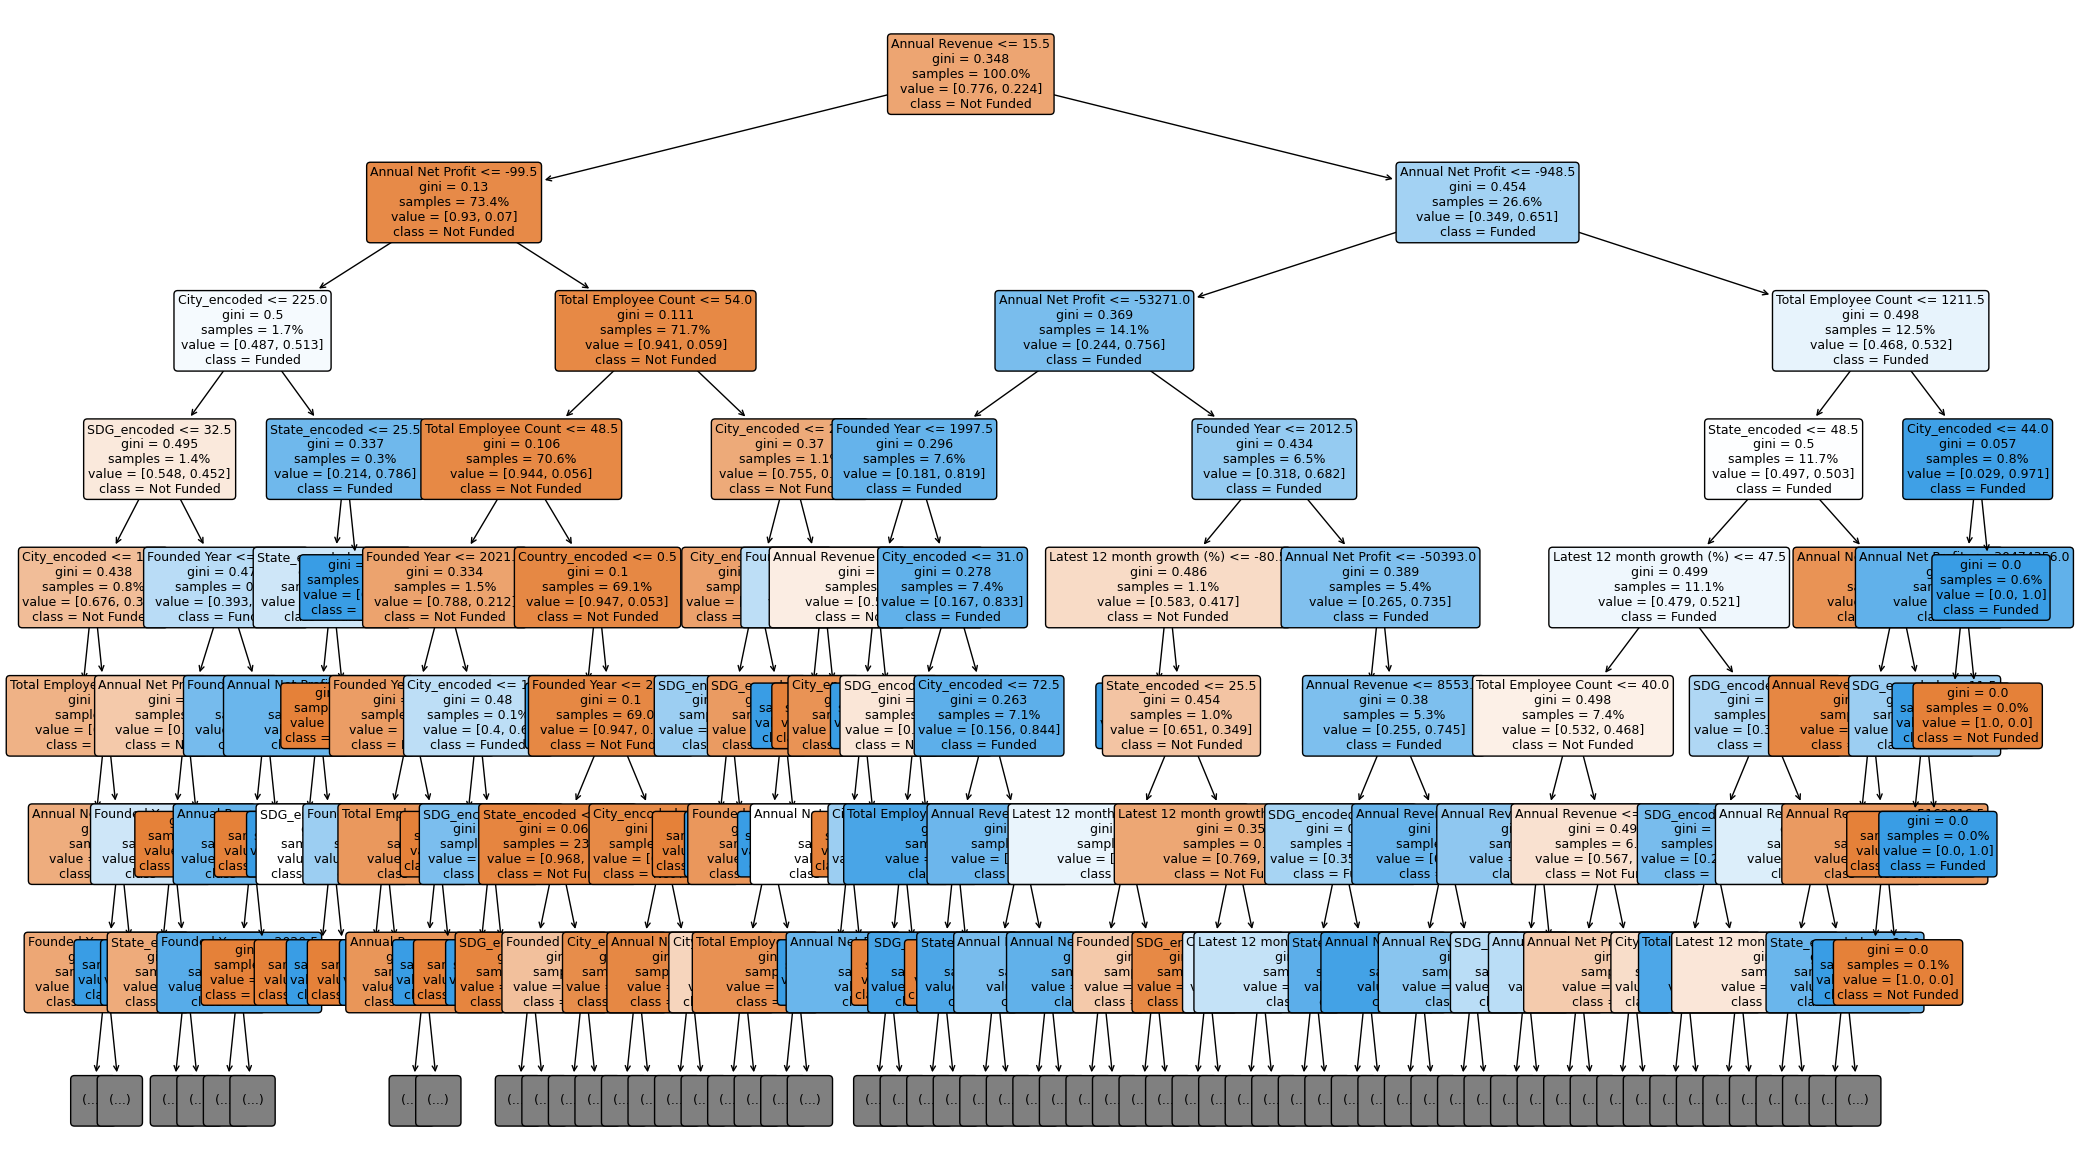

Decision Tree Accuracy: 0.8148820326678766
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       852
           1       0.59      0.59      0.59       250

    accuracy                           0.81      1102
   macro avg       0.74      0.74      0.74      1102
weighted avg       0.81      0.81      0.81      1102

Feature Importances:
 {'SDG_encoded': 0.07517172598700926, 'Founded Year': 0.0885440125457715, 'Country_encoded': 0.001359147485954238, 'State_encoded': 0.0556855358263417, 'City_encoded': 0.07378492247609669, 'Annual Revenue': 0.49442645461160434, 'Latest 12 month growth (%)': 0.04932254836723257, 'Annual Net Profit': 0.12095665889762888, 'Total Employee Count': 0.04074899380236089}


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file = 'Group1&2 - DecisionTree & CHAID.csv'
df = pd.read_csv(file)

# Display the first few rows and basic info about the dataset
print(df.head())
print(df.info())
from sklearn.preprocessing import LabelEncoder

# Convert 'Is Funded' to binary (1 for Yes, 0 for No)
df['Is_Funded'] = (df['Is Funded'] == 'Yes').astype(int)

# Ensure the relevant columns are strings before processing
df['Total Funding'] = df['Total Funding'].astype(str)
df['Annual Revenue'] = df['Annual Revenue'].astype(str)
df['Latest 12 month growth (%)'] = df['Latest 12 month growth (%)'].astype(str)
df['Annual Net Profit'] = df['Annual Net Profit'].astype(str)
df['Total Employee Count'] = df['Total Employee Count'].astype(str)

# Handle missing values and clean financial data
df['Total Funding'] = df['Total Funding'].str.replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)
df['Annual Revenue'] = df['Annual Revenue'].str.replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)
df['Latest 12 month growth (%)'] = df['Latest 12 month growth (%)'].str.replace('[\%,]', '', regex=True).astype(float)
df['Annual Net Profit'] = df['Annual Net Profit'].str.replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)
df['Total Employee Count'] = df['Total Employee Count'].str.replace(',', '').astype(float)

df['Total Funding'].fillna(0, inplace=True)
df['Annual Revenue'].fillna(0, inplace=True)
df['Latest 12 month growth (%)'].fillna(0, inplace=True)
df['Annual Net Profit'].fillna(0, inplace=True)
df['Total Employee Count'].fillna(df['Total Employee Count'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['SDG_encoded'] = le.fit_transform(df['SDG'])
df['Country_encoded'] = le.fit_transform(df['Country'])
df['State_encoded'] = le.fit_transform(df['State'])
df['City_encoded'] = le.fit_transform(df['City'])

# Create feature matrix and target variable
X = df[['SDG_encoded', 'Founded Year', 'Country_encoded', 'State_encoded', 'City_encoded',
        'Annual Revenue', 'Latest 12 month growth (%)', 'Annual Net Profit', 'Total Employee Count']]
y = df['Is_Funded']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle remaining NaNs

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute remaining missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data

# Build and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_classification_report = classification_report(y_test, y_pred)

# Visualize the Decision Tree
# Visualize the Decision Tree with better readability
plt.figure(figsize=(25,15))  # Increase the figure size for better readability
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Not Funded', 'Funded'],
    filled=True,
    rounded=True,
    fontsize= 9, # Increase font size for better readability
     proportion=True,  # Scale the nodes to reflect the proportion of samples
    max_depth=7  # Limit the depth of the tree to make it more readable
)
plt.show()

# Feature Importance
importances = dt.feature_importances_
feature_importances = {feature: importance for feature, importance in zip(X.columns, importances)}

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_classification_report)
print("Feature Importances:\n", feature_importances)